In [1]:
using Plots
using QuadGK
using Printf
using ForwardDiff

In [2]:
function test_composition(v, εmax)
    ε = εmax
    γ(x) = x - ε * v(x)
    
    x = rand()
    for i in 1:5
        println("iter $i: ", γ(x))
        ε *= 0.9
    end
end

test_composition (generic function with 1 method)

In [3]:
test_composition(x -> x^2 - 1, 1.)

iter 1: 1.2473579347922708
iter 2: 1.177762243654174
iter 3: 1.1151261216298867
iter 4: 1.058753611808028
iter 5: 1.0080183529683555


In [4]:
include("src/linesearch.jl")
include("src/functionals.jl")
include("src/transform.jl")

Q_reparametrization (generic function with 1 method)

In [5]:
function backtracking(q, r, v, εmax; ρ=0.5, c=0.1, maxiter=100)
    # Initialize step length
    ε = εmax

    # Create function stepping along v
    γ(x) = x - ε * v(x)

    # Get initial values for sufficient decrease condition.
    E0 = l2_distance(q, r)^2
    v0 = l2_norm(v)^2
    
    l = make_weak_wolfe_line(E0, v0, c)
    ϕ = Q_reparametrization(r, γ)

    
    # Initialize iteration and reduce steplength until it satisfies weak wolfe
    iter = 0
    while l2_distance(q, r ∘ γ)^2 > l(ε) && iter < maxiter
        iter += 1
        ε *= ρ
        @printf "Iter %4d: %10.5f vs. %10.5f\n" iter l2_distance(q, r ∘ γ)^2 l(ε)
    end

    # Warn user if backtracking didn't work
    if iter == maxiter
        println("[backtracking] Warning: Couldn't find sufficient decrease stepsize in $iter steps.")
    end

    return ε
end


function make_weak_wolfe_line(E0, v0, c)
    a = c * v0
    function (ε)
        return E0 - a * ε
    end
end

make_weak_wolfe_line (generic function with 1 method)

In [ ]:
function wolfesearch(q, r, v, εmax; c1=0.1, c2=0.9, maxiter=100)
    a0 = 0.
    ε1 = εmax / 2
    γ(x) = x - ε1 * v(x)
    r_new = Q_reparametrization(r, γ)
    
    # Get initial values for sufficient decrease condition.
    E0 = l2_distance(q, r)^2
    v0 = l2_norm(v)^2
    
    l = make_weak_wolfe_line(E0, v0, c)
    while iter < maxiter
        if l2_distance(q, r_new)^2 > l(ε) || (l2_distance(q, r_new)^2 > )
        
    end

In [8]:
X = 0:0.01:1

0.0:0.01:1.0

Iter    1: ε: 3.00000e+00  2.935800673079053e-01 <? 2.333333333333332e-02 True: 0
Iter    2: ε: 1.50000e+00  1.106099561264557e-01 <? 2.833333333333332e-02 True: 0
Iter    3: ε: 7.50000e-01  3.908973594341152e-02 <? 3.083333333333332e-02 True: 0
Iter    4: ε: 3.75000e-01  2.339729621253419e-02 <? 3.208333333333332e-02 True: 1
Iter    5: ε: 1.87500e-01  2.599755886454077e-02 <? 3.270833333333332e-02 True: 1
Iter    6: ε: 9.37500e-02  2.913802340377944e-02 <? 3.302083333333332e-02 True: 1
Iter    7: ε: 4.68750e-02  3.111057353379813e-02 <? 3.317708333333332e-02 True: 1
Iter    8: ε: 2.34375e-02  3.219145686374568e-02 <? 3.325520833333332e-02 True: 1
Iter    9: ε: 1.17188e-02  3.275486482257514e-02 <? 3.329427083333332e-02 True: 1
Iter   10: ε: 5.85938e-03  3.304222802974334e-02 <? 3.331380208333332e-02 True: 1


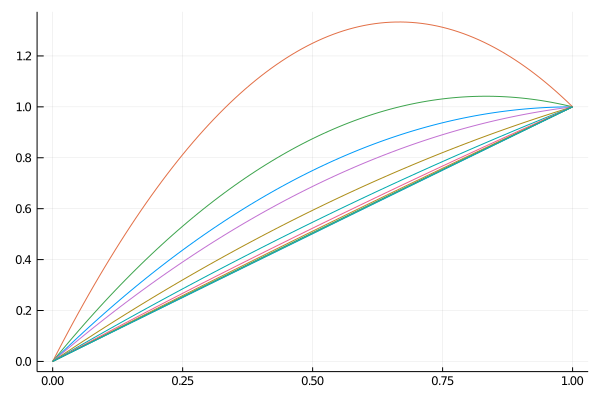

In [12]:
id(x) = x

f(x) = x - x * (x - 1)
v(x) = x * (x-1)


ε = 3.

γ = x -> x - ε * v(x)

E0 = l2_distance(f, id)^2
v0 = l2_norm(v)^2
c = 0.1



l = make_weak_wolfe_line(E0, v0, c)

p = plot(f, X, label="Analytic", legend=false)

ϕ = Q_reparametrization(id, γ)
for i in 1:10
    @printf "Iter %4d: ε: %10.5e  %10.15e <? %10.15e True: %d\n" i ε l2_distance(f, ϕ)^2 l(ε) (l2_distance(f, ϕ)^2 <= l(ε))
    p = plot!(γ, X, label="ε=$ε")
    ε *= 0.5
end


function max_step_length(v; Nfine=201, alpha=0.95)
    vdt(x) = ForwardDiff.derivative(v, x)
    vi = vdt.(range(0, 1, length=Nfine))
    return 0.95 / maximum(vi)
end

p

In [10]:
backtracking(f, id, v, 3.)

Iter    1:    0.00833 vs.    0.02833


1.5

In [162]:
function max_step_length(v; Nfine=201, alpha=0.95)
    vdt(x) = ForwardDiff.derivative(v, x)
    vi = vdt.(range(0, 1, length=Nfine))
    return 0.95 / maximum(vi)
end

max_step_length (generic function with 1 method)

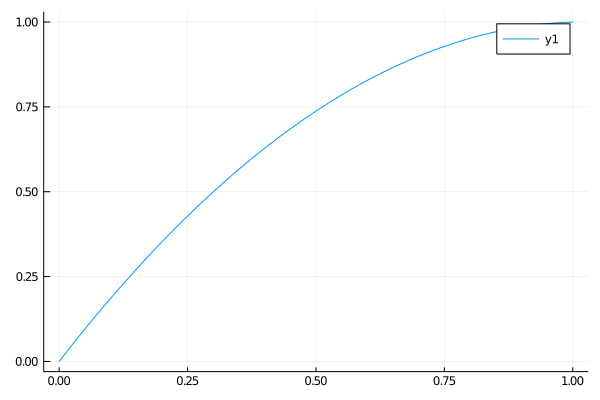

In [168]:
plot(x -> x - εmax * v(x), X)